## LivingEarth LCCS - Test DEA Notebook

Notebook to test LCCS classifcation using DEA

In [1]:
import numpy
import xarray
import scipy
from matplotlib import pyplot
import datacube
from datacube.storage import masking

Import LivingEarth LCCS modules from https://bitbucket.org/au-eoed/livingearth_lccs/
The git checkout needs to be on your PYTHONPATH using:

```
export PYTHONPATH=/path/to/livingearth_lccs:$PYTHONPATH
```
before opening the notebook or edit and run the line below

In [2]:
import sys
sys.path.append("../livingearth_lccs")

In [3]:
# Import le_lccs modules
from le_lccs import le_ingest
from le_lccs.le_classification import lccs_l3

## Data input from DEA

Read in data from DEA using Open Data Cube interface

Set up datacube object and set bounds

In [4]:
variables_xarray_list = []

dc = datacube.Datacube(app="le_lccs")

# Use 100 x 100 m to make it a bit easier
pixel_size_x = 100
pixel_size_y = -100

min_x = 1500000.000
max_x = 1600000.000
min_y = -2200000.000
max_y = -2100000.000

out_crs = "EPSG:3577"

min_lon = 146.39916792060743
max_lon = 146.29233424663812
min_lat = -19.740788455284356
max_lat = -18.84675082028807

start_time = "2017-01-01"
end_time = "2018-01-15"

Load in data from DEA for each variable. Need to have each of the following variables:

* vegetat_veg_cat
* aquatic_wat_cat
* cultman_agr_cat
* artific_urb_cat
* artwatr_wat_cat

### vegetat_veg_cat

Load in data to make vegetat_veg_cat.

In [33]:
var_xarray = dc.load(product="fc_percentile_albers_annual", measurements=["PV_PC_10", "NPV_PC_10"],
                     x=(min_x, max_x),
                     y=(min_y, max_y),
                     crs=out_crs,
                     resolution=(pixel_size_x, pixel_size_y),
                     time=(start_time, end_time))

#Check that dataset exists
var_xarray

<xarray.Dataset>
Dimensions:    (time: 1, x: 1000, y: 1000)
Coordinates:
  * time       (time) datetime64[ns] 2017-01-01
  * y          (y) float64 -2.2e+06 -2.2e+06 -2.2e+06 ... -2.1e+06 -2.1e+06
  * x          (x) float64 1.6e+06 1.6e+06 1.6e+06 ... 1.5e+06 1.5e+06 1.5e+06
Data variables:
    PV_PC_10   (time, y, x) int8 36 59 60 32 51 59 57 ... -1 -1 -1 -1 -1 -1 -1
    NPV_PC_10  (time, y, x) int8 8 4 3 10 5 3 4 5 4 ... -1 -1 -1 -1 -1 -1 -1 -1
Attributes:
    crs:      EPSG:3577

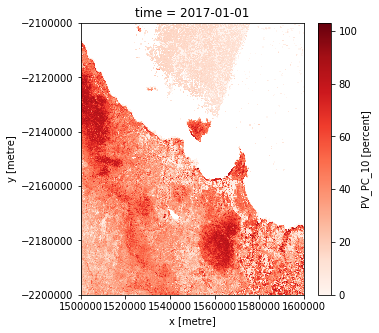

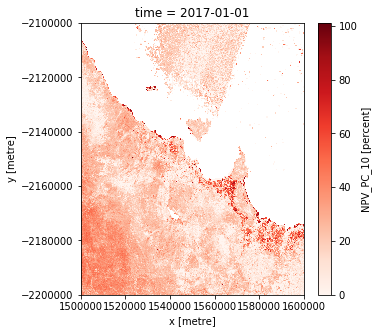

In [31]:
#Plot data
var_xarray = masking.mask_invalid_data(var_xarray)
var_xarray.PV_PC_10.plot(figsize=(5, 5), cmap = 'Reds')
var_xarray.NPV_PC_10.plot(figsize=(5, 5), cmap = 'Reds')

In [7]:
# Create binary layer representing vegetated (1) and non-vegetated (0)
vegetat_veg_cat_ds = ((var_xarray["PV_PC_10"] >= 1) | (var_xarray["NPV_PC_10"] >= 1))

In [8]:
# Convert to Dataset and add name
vegetat_veg_cat_ds = vegetat_veg_cat_ds.to_dataset(name="vegetat_veg_cat")

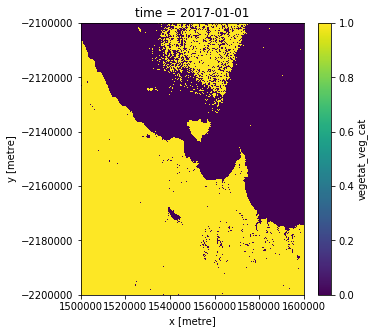

In [34]:
# Plot output
vegetat_veg_cat_ds["vegetat_veg_cat"].plot(figsize=(5, 5))

In [24]:
# Add to output array
variables_xarray_list.append(vegetat_veg_cat_ds)

### aquatic_wat_cat

Load in data to make aquatic_wat_cat. Currently this notebook only utilises WOfs annual summary, however Mangroves and ITEMs layers should also be loaded and combined.

In [35]:
var_xarray = dc.load(product="wofs_annual_summary",measurements=["count_wet"], 
                     x=(min_x, max_x),
                     y=(min_y, max_y),
                     crs=out_crs,
                     resolution=(pixel_size_x, pixel_size_y),
                     time=(start_time, end_time))

#Check that dataset exists
var_xarray

<xarray.Dataset>
Dimensions:    (time: 1, x: 1000, y: 1000)
Coordinates:
  * time       (time) datetime64[ns] 2017-01-01
  * y          (y) float64 -2.2e+06 -2.2e+06 -2.2e+06 ... -2.1e+06 -2.1e+06
  * x          (x) float64 1.6e+06 1.6e+06 1.6e+06 ... 1.5e+06 1.5e+06 1.5e+06
Data variables:
    count_wet  (time, y, x) int16 0 0 0 0 0 0 0 0 0 ... 33 31 31 32 32 35 35 35
Attributes:
    crs:      EPSG:3577

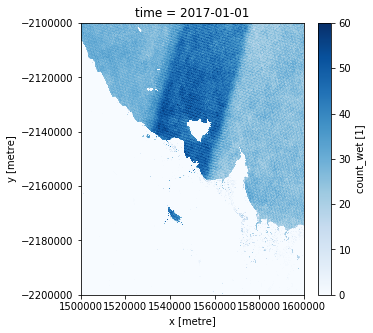

In [37]:
#Plot data
var_xarray = masking.mask_invalid_data(var_xarray)
var_xarray.count_wet.plot(figsize=(5, 5), cmap = 'Blues')

In [40]:
# Create binary layer representing aquatic (1) and terrestrial (0)
aquatic_wat_cat_ds = ((var_xarray["count_wet"] >= 10))

In [41]:
# Convert to Dataset and add name
aquatic_wat_cat_ds = aquatic_wat_cat_ds.to_dataset(name="aquatic_wat_cat")

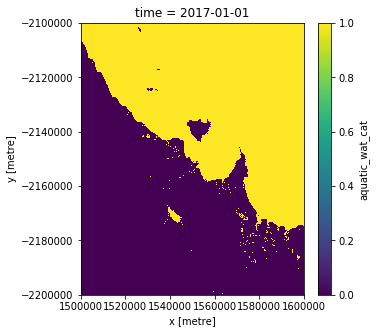

In [42]:
# Plot output
aquatic_wat_cat_ds["aquatic_wat_cat"].plot(figsize=(5, 5))

In [43]:
# Add to output array
variables_xarray_list.append(aquatic_wat_cat_ds)

### cultman_agr_cat

Load in data to make cultman_agr_cat. Currently this notebook only utilises a static layer, the ABARES Catchment scale land use of Australia (2017), however aim to use geomedian to classify cultivated/managed areas

In [35]:
var_xarray = dc.load(product="wofs_annual_summary",measurements=["count_wet"], 
                     x=(min_x, max_x),
                     y=(min_y, max_y),
                     crs=out_crs,
                     resolution=(pixel_size_x, pixel_size_y),
                     time=(start_time, end_time))

#TODO: load ABARES product (/g/data/r78/LCCS_Aberystwyth/static_layers/clum_50m0917m.tif) as subset xarray


<xarray.Dataset>
Dimensions:    (time: 1, x: 1000, y: 1000)
Coordinates:
  * time       (time) datetime64[ns] 2017-01-01
  * y          (y) float64 -2.2e+06 -2.2e+06 -2.2e+06 ... -2.1e+06 -2.1e+06
  * x          (x) float64 1.6e+06 1.6e+06 1.6e+06 ... 1.5e+06 1.5e+06 1.5e+06
Data variables:
    count_wet  (time, y, x) int16 0 0 0 0 0 0 0 0 0 ... 33 31 31 32 32 35 35 35
Attributes:
    crs:      EPSG:3577

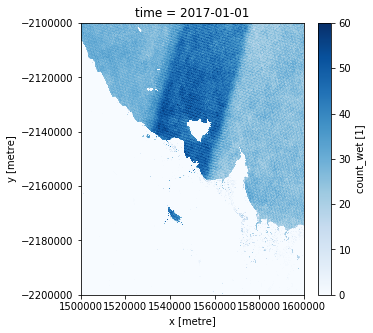

In [37]:
#Plot data
var_xarray = masking.mask_invalid_data(var_xarray)
var_xarray.count_wet.plot(figsize=(5, 5), cmap = 'Blues')

In [40]:
# Create binary layer representing aquatic (1) and terrestrial (0)
aquatic_wat_cat_ds = ((var_xarray["count_wet"] >= 10))

In [41]:
# Convert to Dataset and add name
aquatic_wat_cat_ds = aquatic_wat_cat_ds.to_dataset(name="aquatic_wat_cat")

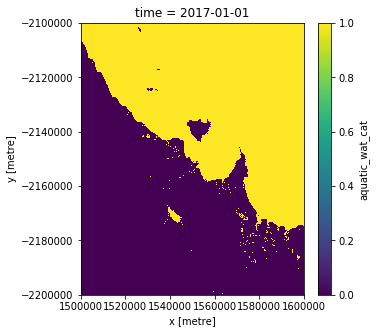

In [42]:
# Plot output
aquatic_wat_cat_ds["aquatic_wat_cat"].plot(figsize=(5, 5))

In [43]:
# Add to output array
variables_xarray_list.append(aquatic_wat_cat_ds)

## Classification

The LCCS classificaition is hierachial. The 8 classes are shown below.

| Class name | Code | Numeric code |
|----------------------------------|-----|-----|
| Cultivated Terrestrial Vegetated | A11 | 111 |
| Natural Terrestrial Vegetated | A12 | 112 |
| Cultivated Aquatic Vegetated | A23 | 123 |
| Natural Aquatic Vegetated | A24 | 124 |
| Artificial Surface | B15 | 215 |
| Natural Surface | B16 | 216 |
| Artificial Water | B27 | 227 |
| Natural Water | B28 | 228 |

The previous code dealt with missing layers by setting all values to 0 and then using this in the classification. This could cause problems. For example with the missing `artwatr_wat_cat` layer all values would be 0 so all water would be assigned a supercatergory of 'Natural Water (B28)'. In this system Artifical Water and Natural water would both be assigned 0 in the Level 3 classification but values for Level 2 would be stored.

In [ ]:
# Merge to a single dataframe
classification_data = xarray.merge(variables_xarray_list)

Before running the classification can look at some of the input layers using the matplotlib `imshow` function. Although quite limited it works as a quick check that the data layers have been read in OK

### Apply classification

Apply Level 3 classification using separate function. Works through in three stages and saves final class to "Supercategory".

In [ ]:
level1, level2, level3 = lccs_l3.classify_lccs_level3(classification_data)

### Display output

To check the results can use matplotlib to show an image. Use `colour_lccs_level3` to get the colour scheme.

In [ ]:
red, green, blue, alpha = lccs_l3.colour_lccs_level3(level3[0])
pyplot.imshow(numpy.dstack([red, green, blue, alpha]))

In [ ]:
# Check classses within scene.
numpy.unique(level3)

### Save classification values back to xarray

In [ ]:
out_class_xarray = xarray.Dataset({"level1" : (classification_data["vegetat_veg_cat"].dims, level1),
                                   "level2" : (classification_data["vegetat_veg_cat"].dims, level2),
                                   "level3" : (classification_data["vegetat_veg_cat"].dims, level3)})
classification_data = xarray.merge([classification_data, out_class_xarray])

### Save to a netCDF file

Specify NETCDF4 as this supports unsigned integers. For this to work need to have netCDF4 library installed.

In [ ]:
classification_data.to_netcdf("data/classification_data.nc", format="NETCDF4")